### SVM_Naive_Bayes_01

#### Disciplina Inteligência Artificial

#### Prof: José Humberto Cruvinel


In [1]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn import svm
%matplotlib inline 

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()
# Convertendo para dataframe do Pandas
df = pd.DataFrame(wine.data)
df.columns = wine.feature_names
# Adicionando as colunas Target e Target_Name
df['Target'] = wine.target
df['Target_Name'] = df.apply(lambda row: wine.target_names[int(row.Target)], axis=1)
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target,Target_Name
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [3]:
df['Target'].value_counts()

1    71
0    59
2    48
Name: Target, dtype: int64

In [4]:
X = df.iloc[:,:-1]
y = df['Target'].values

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X , y, test_size=0.2, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (142, 14)
y_train: (142,)
X_test: (36, 14)
y_test: (36,)


In [7]:
!pip install scikit-plot
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scikitplot.metrics import plot_roc
# Criando funcao para imprimir resultados
def show_results(model, X_test, y_test):
  # Modelo 1
  y_pred = model.predict(X_test)
  print('Shape y_pred:',y_pred.shape)
  # Imprimindo o Score para os dados de teste
  print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)
  # Medidas de desempenho
  print("Accuracy:",accuracy_score(y_pred,y_test))
  print("Precision:",precision_score(y_pred,y_test,average='weighted'))
  print("Recall:",recall_score(y_pred,y_test,average='weighted'))
  print("F1 Score:",f1_score(y_pred,y_test,average='weighted'))
  # Imprimindo a matriz de confusão
  plot_confusion_matrix(model, X_test, y_test)
  try:
    plt.show()
    # Plotando a curva ROC para os dados de teste
    y_probas = model.predict_proba(X_test)
    plot_roc(y_test, y_probas, figsize=(10, 8))   
    plt.show()
  except AttributeError:
    print('ROC indisponivel')

Shape y_pred: (36,)
Accuracy is  97.22222222222221
Accuracy: 0.9722222222222222
Precision: 0.9742063492063492
Recall: 0.9722222222222222
F1 Score: 0.9722222222222222


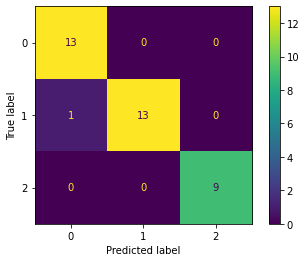

ROC indisponivel


In [8]:
# Criando 4 modelos diferentes de SVM (Suport Vector Machine)
svm_1 = svm.SVC(kernel='linear').fit(X_train, y_train)
show_results(svm_1, X_test, y_test)

Shape y_pred: (36,)
Accuracy is  83.33333333333334
Accuracy: 0.8333333333333334
Precision: 0.8898385565052231
Recall: 0.8333333333333334
F1 Score: 0.8359788359788359


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


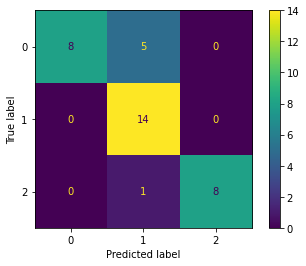

ROC indisponivel


In [9]:
svm_2 = svm.LinearSVC().fit(X_train, y_train)
show_results(svm_2, X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Shape y_pred: (36,)
Accuracy is  38.88888888888889
Accuracy: 0.3888888888888889
Precision: 1.0
Recall: 0.3888888888888889
F1 Score: 0.56


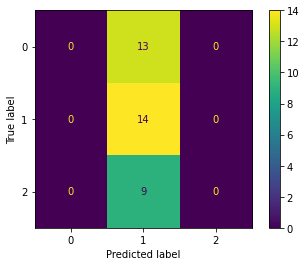

ROC indisponivel


In [10]:
svm_3 = svm.SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)
show_results(svm_3, X_test, y_test)

Shape y_pred: (36,)
Accuracy is  63.888888888888886
Accuracy: 0.6388888888888888
Precision: 0.7129290462623796
Recall: 0.6388888888888888
F1 Score: 0.6552658942364826


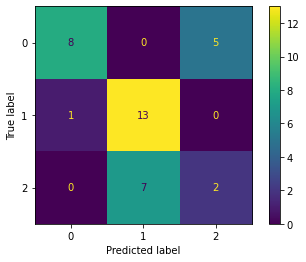

ROC indisponivel


In [11]:
svm_4 = svm.SVC(kernel='poly', degree=3).fit(X_train, y_train)
show_results(svm_4, X_test, y_test)

## Uso de Naive Bayes

Shape y_pred: (36,)
Accuracy is  100.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


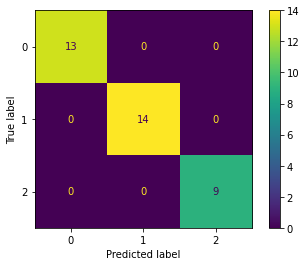

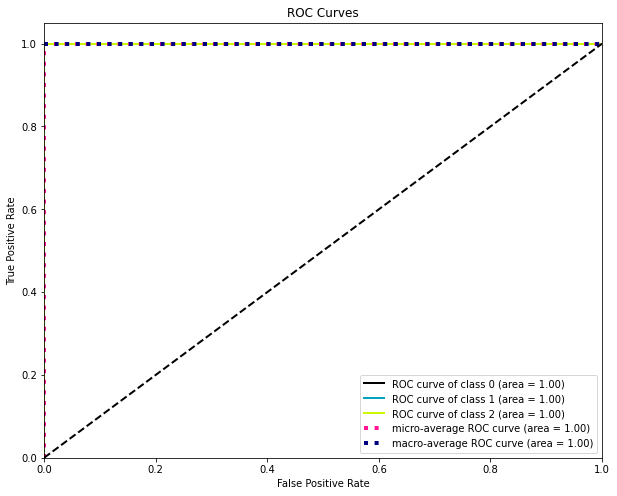

In [12]:
# Agora vamos comparar com Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X, y)
show_results(nb, X_test, y_test)